In [29]:
import pandas as pd

In [30]:
ser_feat_assoc_df = pd.read_pickle("./data/ser_operon_assoc_df.pkl")
ser_feat_assoc_df = ser_feat_assoc_df.append(pd.read_pickle("./data/ser_regulon_assoc_df.pkl"))
ser_feat_assoc_df

,condition,mutated features,odd ratio,p value
0,L-Serine,thrLABC operon,49.626374,0.000050
2,L-Serine,gcvR operon,53.573333,0.000845
4,L-Serine,gcvB operon,53.573333,0.000845
12,L-Serine,gcvA operon,83.750000,0.000372
19,L-Serine,lrp operon,39.372549,0.001504
6,L-Serine,GcvA regulon,63.709443,0.000001


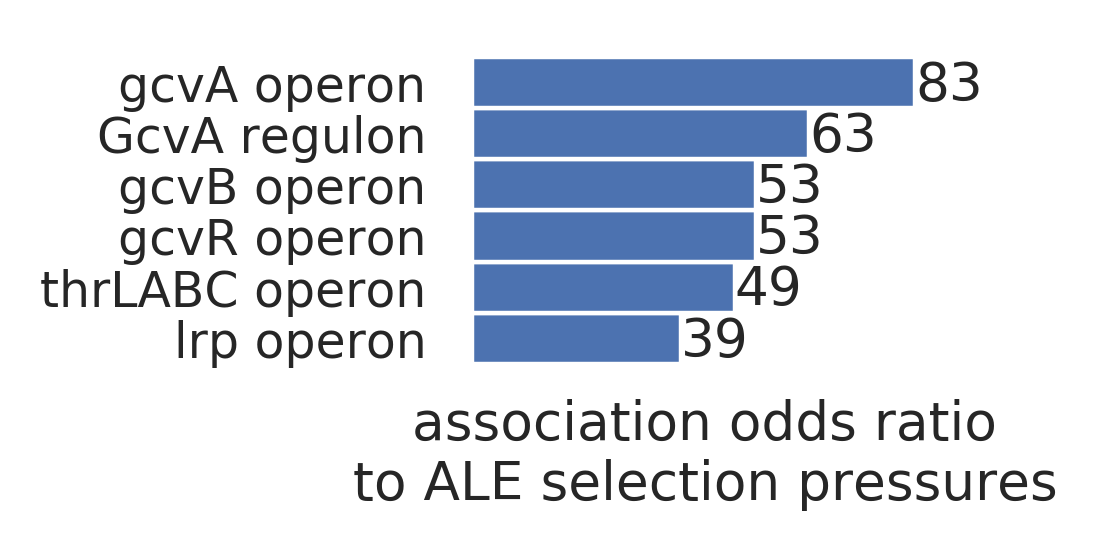

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 400
sns.set_context("paper")
sns.set_style("white")


df = ser_feat_assoc_df.sort_values(by=["odd ratio"], ascending=True)
ax = df.plot.barh(
    y="odd ratio",
    x="mutated features",
    color="#4C72B0",
    figsize=(1.5,1.1),
    width=1
)

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = str(int(r["odd ratio"]))
    ax.text(r["odd ratio"], i-0.35,  s)
    
    
sns.despine(ax=ax,
            top=True,
            right=True, 
            bottom=True,
            left=True
           )

# ax.set_title("L-serine supplementation\nand starting strain associations\nfor significantly mutated features")
ax.get_legend().remove()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    labelbottom=False) # labels along the bottom edge are off
# ax.set_ylabel('significantly\nmutated\nfeature')
ax.set_ylabel('')
ax.set_xlabel("association odds ratio\nto ALE selection pressures")
plt.savefig("fig.svg", format="svg")